<a href="https://colab.research.google.com/github/RaulMrSouza/Bollinger-Buy/blob/master/Bollinger_Buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import DataFrame
from datetime import date, timedelta
import numpy as np

In [14]:
df = web.DataReader('SUZB3.SA', 'yahoo', date.today() - timedelta(days=360), date.today())
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,49.700001,47.000000,47.000000,47.599998,11411700.0,47.599998
2020-05-12,49.480000,46.610001,48.200001,48.549999,8104600.0,48.549999
2020-05-13,51.200001,48.669998,49.080002,50.590000,11670500.0,50.590000
2020-05-14,51.150002,46.549999,51.000000,47.540001,12031000.0,47.540001
2020-05-15,48.840000,45.430000,46.400002,46.160000,10024000.0,46.160000


In [0]:
#Calculate Bollinger Bands Values
df['20 Day MA'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std() 
    
df['Upper'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df['Lower'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

In [0]:
df = df[20:]
#Set the buy and sell conditions
df['B'] =  ((df['Close'] >=  df['Lower']) & (df['Close'] >  df['Open']) & (df['Close'].shift(periods=1) <  df['Open'].shift(periods=1)) & (df['Close'].shift(periods=1) <  df['Lower'].shift(periods=1))  & (df['Volume'] > df['Volume'].shift(periods=1) )) 
df = df.assign(Buy=np.where(df['B'] , df['Lower'], float("NaN")))

df['S'] =  ((df['Close'] <=  df['Upper']) & (df['Close'] <=  df['Open']) & (df['Close'].shift(periods=1) >  df['Open'].shift(periods=1)) & (df['Close'].shift(periods=1) >  df['Upper'].shift(periods=1))  & (df['Volume'] > df['Volume'].shift(periods=1) )) 
df = df.assign(Sell=np.where(df['S'] , df['Upper'], float("NaN")))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 12))

Buy on the <font color='blue'>*Blue*</font> dot and stop operation on the <font color='red'>*Red*</font> dot, assuming markets usally are bullish

Comprar no ponto <font color='blue'>*Azul*</font> e sair da operação no <font color='red'>*Vermelho*</font>, considerando que mercados normalmente se valorizam

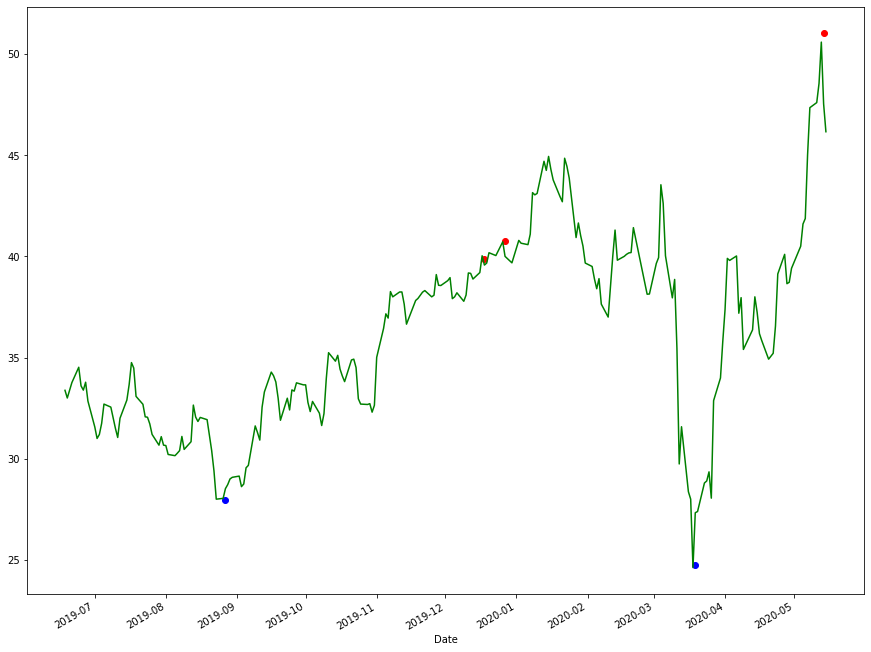

In [18]:
df['Buy'].plot(label='Buy', linestyle='--', marker='o', color='b')
df['Sell'].plot(label='Sell', linestyle='--', marker='o', color='r')
df['Close'].plot(label='Close', color='g')